1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

%matplotlib inline

In [81]:
import pandas as pd
# Path to your file
PATH = "/content/sample_data/heart.csv" 

df = pd.read_csv(PATH)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Data Analysis

1. Explore the data

In [82]:
# Data analysis
# Todo: analyze your data here

In [83]:
def analyze_dataset(df):
    print("First 10 rows of the dataset:\n", df.head(10)) # Preview the first 10 rows
    print("\nDataset information:")
    print(df.info()) # Check the dataset information
    print("\nStatistical summary of continuous variables:") 
    print(df.describe()) # View the statistical summary of continuous variables
    print("\nMissing values in the dataset:")
    print(df.isnull().sum()) # Identify missing values

analyze_dataset(df)

First 10 rows of the dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   46    1   0       120   249    0        0      144      0      0.8      2   
1   71    0   1       160   302    0        1      162      0      0.4      2   
2   71    0   1       160   303    0        1      163      0      0.4      2   
3   71    0   1       160   304    0        1      164      0      0.4      2   
4   71    0   1       160   305    0        1      165      0      0.4      2   
5   71    0   1       160   306    0        1      166      0      0.4      2   
6   71    0   1       160   301    0        1      161      0      0.4      2   
7   71    0   1       160   300    0        1      160      0      0.4      2   
8   71    0   1       160   299    0        1      159      0      0.4      2   
9   71    0   1       160   298    0        1      158      0      0.4      2   

   ca  thal  target  
0   0     3       0  
1   2     2       1  
2   2     2

In [84]:
print("categorical columns")
categorical_columns = df.columns.intersection(['sex', 'cp', 'fbs', 'restecg', 'thal', 'exang', 'slope', 'targer'])
print(categorical_columns)

print("continous columns")
continous_columns = df.columns.difference(categorical_columns)
print(continous_columns)

categorical columns
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
continous columns
Index(['age', 'ca', 'chol', 'oldpeak', 'target', 'thalach', 'trestbps'], dtype='object')


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'ca'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'trestbps'}>, <Axes: >, <Axes: >]],
      dtype=object)

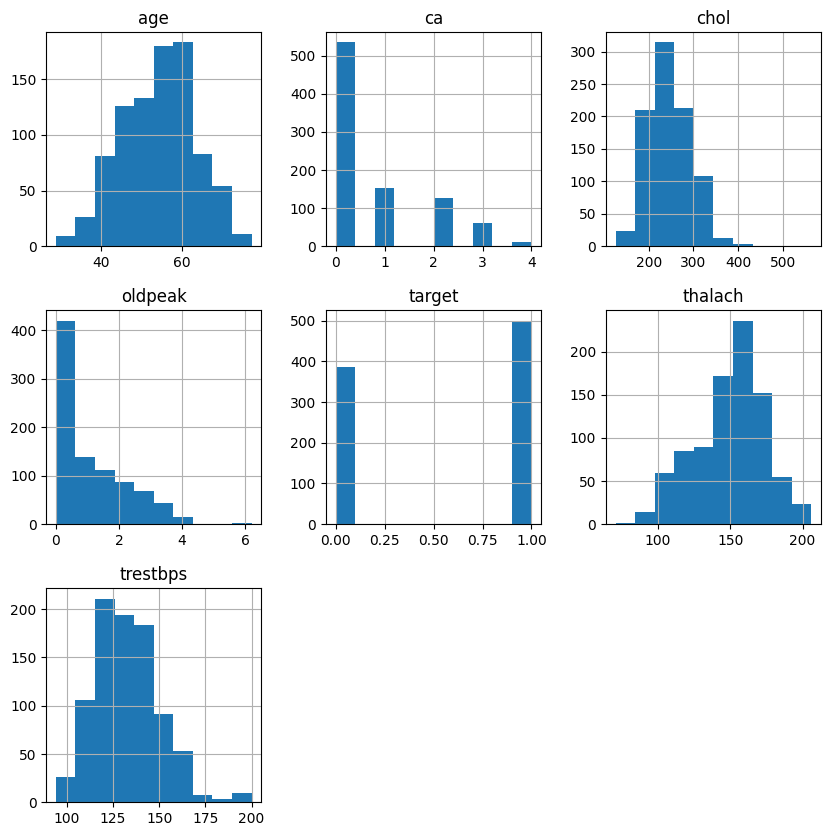

In [85]:
names = list(continous_columns)
df.hist(column = names, figsize = (10,10))

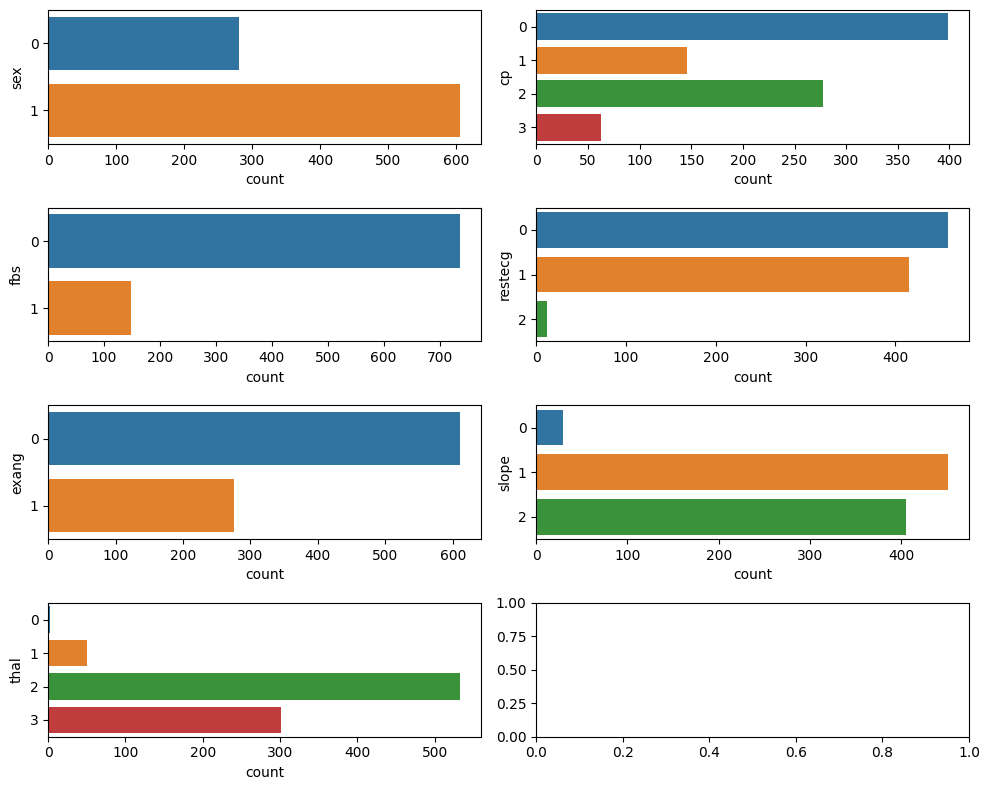

In [86]:
num_cols = len(categorical_columns) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

for i in range(num_cols):
    row = i // 2 
    col = i % 2 
    
    col_name = categorical_columns[i]
    sns.countplot(y=col_name, data=df, ax=axes[row, col])
    
plt.tight_layout()
plt.show()

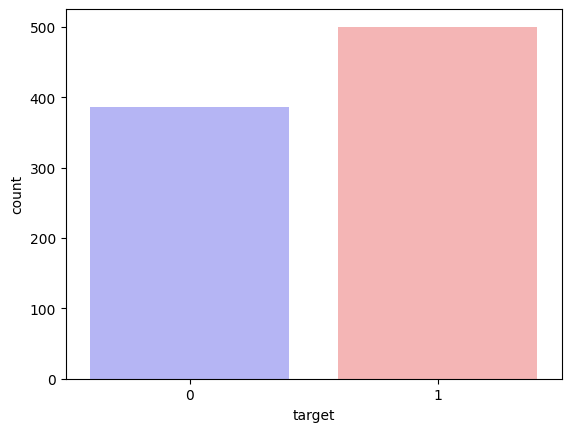

In [87]:
sns.countplot(x="target", data=df, palette="bwr") # 'target' column
plt.show()

<Axes: >

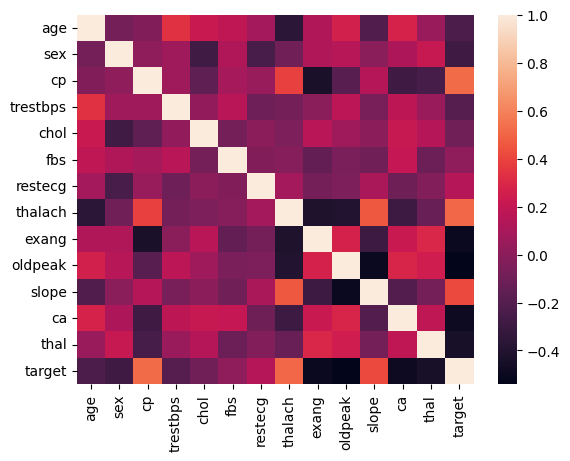

In [88]:
sns.heatmap(df.corr())

## Preprocessing

In [89]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """

    # drop any rows with missing values
    df.dropna(inplace=True)

    # impute missing values in numerical columns using the mean
    num_imputer = SimpleImputer(strategy='mean')
    num_cols = df.select_dtypes(include='number').columns
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    return df

In [90]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [91]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Label encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Normalize numerical variables
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

<Axes: >

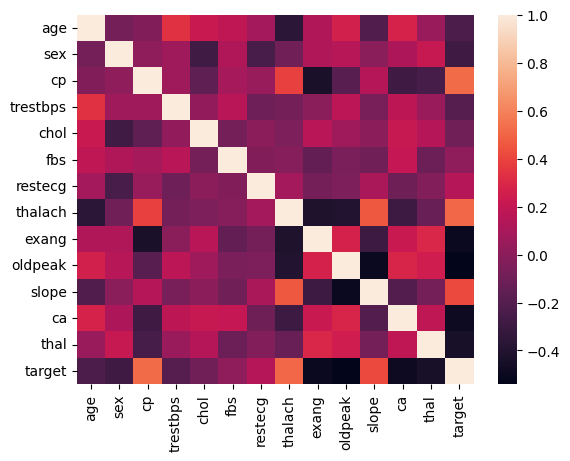

In [92]:
df = apply_feature_engineering(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [93]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target', axis=1, inplace=False) # Todo: Select features
    y = df['target'] # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [94]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1234
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

def build_model(X, y, param_grid=None):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    
    # Todo: Input your scaler and logistic model into pipeline
    # Find best penalty and solver for logistic regression
    model = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())])    
    # Todo: fit your model with X, y
    if param_grid is not None:
        param_grid = {"logistic__"+k: v for k, v in param_grid.items()}
        model = GridSearchCV(model, param_grid, cv=5)
        est = model.fit(X, y)
        df_best_hyperparams = pd.DataFrame(est.cv_results_)
        best_est = df_best_hyperparams[df_best_hyperparams['rank_test_score']==1].iloc[0, :]
        best_params = list(best_est['params'].values())
        mean_test_score = best_est['mean_test_score']
        std_test_score = best_est['std_test_score']
        print('Best Penalty and solver combination result:')
        print(f'Penalty {best_params[0].upper()} and solver {best_params[1]} have best results with score: {mean_test_score:.5f} with std: {std_test_score:.5f}')
#         print(df_best_hyperparams)
    else:
        model.fit(X, y)
    return model, best_params

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    confusion_mat = confusion_matrix(y_true , y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred))
    print("Recall: ", recall_score(y_true , y_pred))
    print("F1: ", f1_score(y_true, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_true , y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = recall_score(y_true, y_pred)
    return main_score

param_grid = {'penalty': ['l1', 'l2'],\
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model, best_params = build_model(trainX, trainY, param_grid)
# Compare on training dataset
pred = model.predict(trainX)
pred = model.predict(testX)
target_names = ['No HeartDisease', 'HeartDisease']
print(f'Main metric Recall score: {calculate_performance(testY, pred)}')
print(classification_report(testY, pred, target_names=target_names))

Best Penalty and solver combination result:
Penalty L2 and solver newton-cg have best results with score: 0.93871 with std: 0.02140
Accuracy: 0.9473684210526315
Precision:  0.9666666666666667
Recall:  0.9415584415584416
F1:  0.9539473684210527
Confusion matrix:
[[107   5]
 [  9 145]]
Main metric Recall score: 0.9415584415584416
                 precision    recall  f1-score   support

No HeartDisease       0.92      0.96      0.94       112
   HeartDisease       0.97      0.94      0.95       154

       accuracy                           0.95       266
      macro avg       0.94      0.95      0.95       266
   weighted avg       0.95      0.95      0.95       266



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

In [97]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "To conclude, recall is a crucial metric for heart disease classification, as it prioritizes correctly identifying patients with heart disease, which is essential for early detection and treatment. Missing a patient with heart disease can have more severe consequences than incorrectly diagnosing a patient, which is why I have chosen recall score as my main metric."

In [98]:
get_conclusion()

'7. To conclude, recall is a crucial metric for heart disease classification, as it prioritizes correctly identifying patients with heart disease, which is essential for early detection and treatment. Missing a patient with heart disease can have more severe consequences than incorrectly diagnosing a patient, which is why I have chosen recall score as my main metric.'